In [3]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [4]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [9]:
#shape
print (dataset.shape)
#print first five rows
#print (dataset.head(5))
#print statistical summary using describe()
print (dataset.describe())
#class disctribution
print (dataset.groupby('class').size())

(150, 5)
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


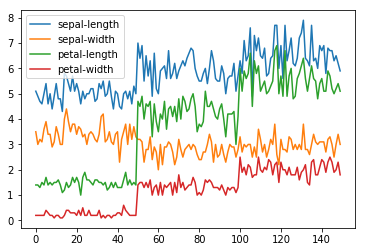

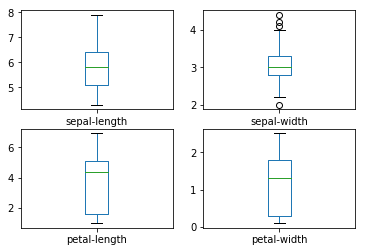

In [26]:
#data visualization
dataset.plot(kind='line',subplots=False,layout=(2,2),sharex=False,sharey=False)
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()


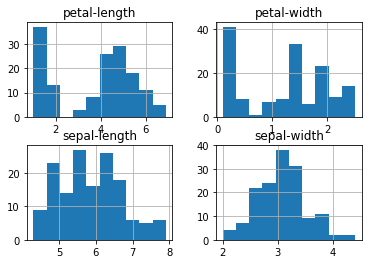

In [30]:
#plot histogram to check the distribution
dataset.hist()
plt.show()

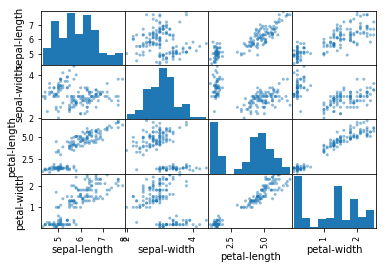

In [28]:
#multivariate plots 
scatter_matrix(dataset)
plt.show()

In [34]:
#create validaton and test data set
#split the validation dataset
array=dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size =0.2
seed =2
X_train, X_validation, Y_train,Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
#print (X,Y)


In [35]:
#divide the data set into 10 parts 
#9 for train and 1 for test
seed =7
scoring = 'accuracy'

In [50]:
#Building Models
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print (msg)

LR: 0.958333 (0.076830)
LDA: 0.975000 (0.053359)
KNN: 0.950000 (0.055277)
CART: 0.958333 (0.055902)
NB: 0.941667 (0.083749)
SVM: 0.975000 (0.038188)


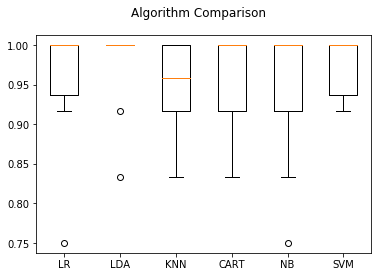

In [38]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [56]:
# Make predictions on validation dataset


In [65]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name,model in models:
    mlAlgo = model
    mlAlgo.fit(X_train, Y_train)
    predictions = mlAlgo.predict(X_validation)
    print ("The ML algorithm used here is",name)
    print("Accuracy Score =  ",accuracy_score(Y_validation, predictions),"\n")
    print("Confusion Matrix = \n",confusion_matrix(Y_validation, predictions),"\n")
    print("Classification Report = \n",classification_report(Y_validation, predictions),"\n")
    print ("\n\n")

The ML algorithm used here is LR
Accuracy Score =   0.9333333333333333 

Confusion Matrix = 
 [[14  0  0]
 [ 0  7  1]
 [ 0  1  7]] 

Classification Report = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.88      0.88      0.88         8

    avg / total       0.93      0.93      0.93        30
 




The ML algorithm used here is LDA
Accuracy Score =   1.0 

Confusion Matrix = 
 [[14  0  0]
 [ 0  8  0]
 [ 0  0  8]] 

Classification Report = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

    avg / total       1.00      1.00      1.00        30
 




The ML algorithm used here is KNN
Accuracy Score =   1.0 

Confusion Matrix = 
 [[14  0  0]
 [ 0  8  0]
 [ 0  

/Users/manish/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
